In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data=pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data['Close']=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train=[]
y_train=[]
for i in range(5,1149):
    X_train.append(trainData[i-5:i,0])
    y_train.append(trainData[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)    

In [9]:
#adding the batch size axis: 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1144, 5, 1)

In [10]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
hist=model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
1144/1144 - 11s - loss: 0.0107 - 11s/epoch - 9ms/step
Epoch 2/100
1144/1144 - 6s - loss: 0.0082 - 6s/epoch - 5ms/step
Epoch 3/100
1144/1144 - 6s - loss: 0.0074 - 6s/epoch - 5ms/step
Epoch 4/100
1144/1144 - 6s - loss: 0.0056 - 6s/epoch - 5ms/step
Epoch 5/100
1144/1144 - 6s - loss: 0.0054 - 6s/epoch - 5ms/step
Epoch 6/100
1144/1144 - 6s - loss: 0.0052 - 6s/epoch - 5ms/step
Epoch 7/100
1144/1144 - 6s - loss: 0.0044 - 6s/epoch - 5ms/step
Epoch 8/100
1144/1144 - 6s - loss: 0.0043 - 6s/epoch - 5ms/step
Epoch 9/100
1144/1144 - 6s - loss: 0.0038 - 6s/epoch - 5ms/step
Epoch 10/100
1144/1144 - 6s - loss: 0.0039 - 6s/epoch - 5ms/step
Epoch 11/100
1144/1144 - 6s - loss: 0.0031 - 6s/epoch - 5ms/step
Epoch 12/100
1144/1144 - 6s - loss: 0.0032 - 6s/epoch - 5ms/step
Epoch 13/100
1144/1144 - 6s - loss: 0.0030 - 6s/epoch - 5ms/step
Epoch 14/100
1144/1144 - 6s - loss: 0.0032 - 6s/epoch - 5ms/step
Epoch 15/100
1144/1144 - 6s - loss: 0.0032 - 6s/epoch - 5ms/step
Epoch 16/100
1144/1144 - 6s - lo

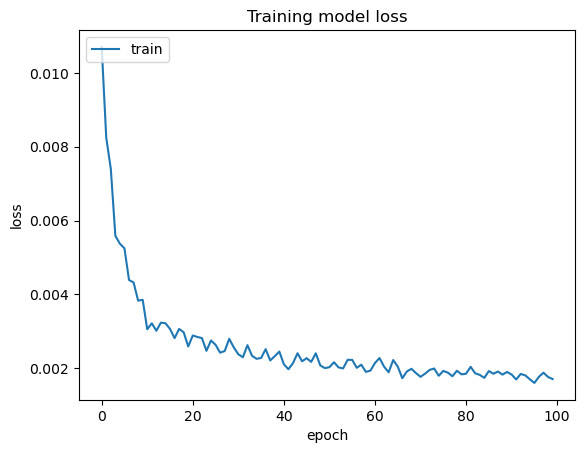

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [13]:
testData=pd.read_csv('Google_Stock_Price_Test.csv')
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[5:,0:].values
#input array for the model:
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
for i in range(5, len(testData)):
    X_test.append(inputClosing_scaled[i - 5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(15, 5, 1)

In [14]:
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 1s 1s/step


array([[0.73573625],
       [0.7355205 ],
       [0.74528456],
       [0.745383  ],
       [0.7504318 ],
       [0.7413821 ],
       [0.7473264 ],
       [0.73660445],
       [0.74503934],
       [0.7719408 ],
       [0.7796858 ],
       [0.80622756],
       [0.7968695 ],
       [0.7901614 ],
       [0.7471906 ]], dtype=float32)

In [15]:
predicted_price=sc.inverse_transform(y_pred)

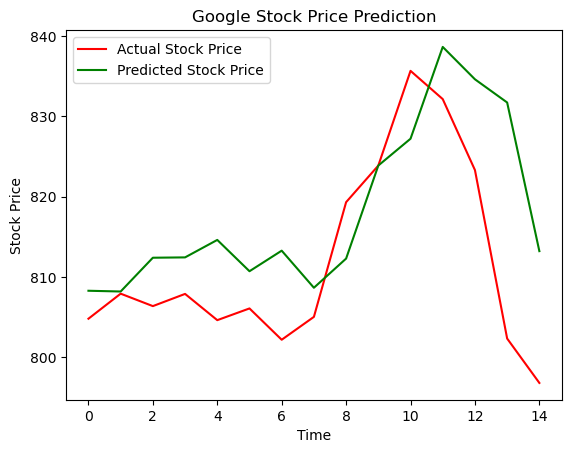

In [16]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()